### Practice Exercises (Polynomial Regression Model)

In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent
sys.path.insert(0, str(project_root))

from pathlib import Path
import sys

current_dir = Path.cwd()

project_root = current_dir.parent.absolute()

sys.path.insert(0,str(project_root))

from config import DATASETS_DIR, TEMP_POWER_USAGE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# loading the dataset
df = pd.read_csv(TEMP_POWER_USAGE)

df.shape

(10, 2)

In [24]:
#feature and target variable
X = df[['Temperature']].values
y = df[['PowerUsage']].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
#sorting the randomly sorted X_train set
X_sorted = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)

here in the evalution, it is clearly visible tht linear regression is not fit for this dataset as it R2 score is 0.314.
so we have to use polynomial regression

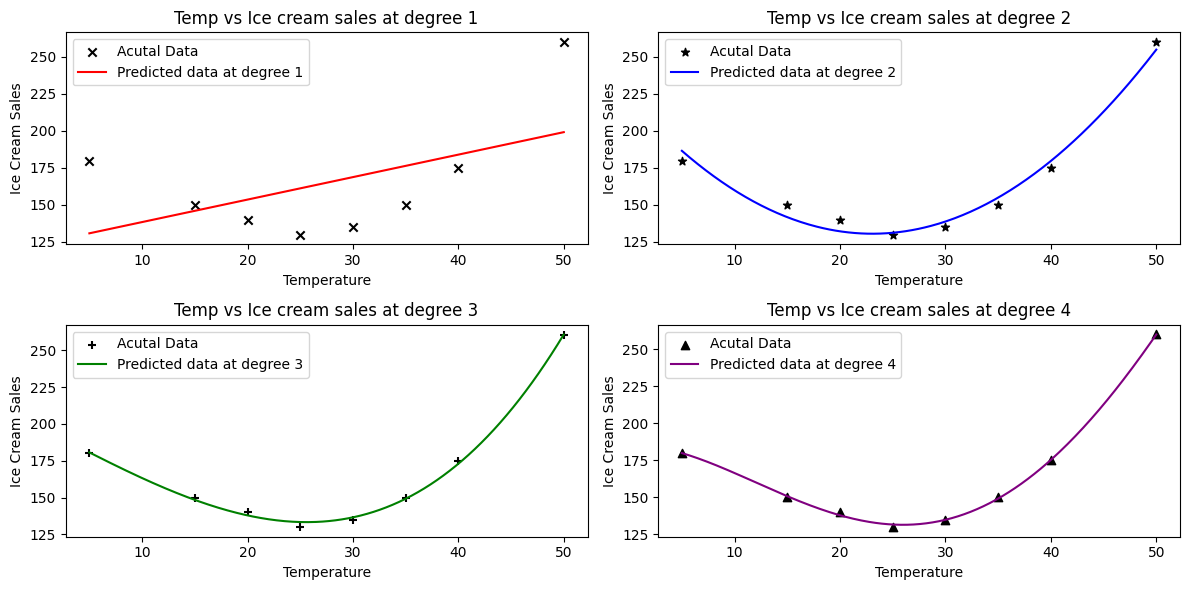

In [44]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

degrees = [1,2,3,4]
markers = ['x','*','+','^']
colors = ['r','blue','green','purple']

plt.figure(figsize=(12,6))

for i, degree in enumerate(degrees):
    plt.subplot(2, 2, i+1)

    #ffit the model
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    ln_poly = LinearRegression()
    ln_poly.fit(X_poly,y_train)

    #visualization of the sets

    X_smooth = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
    X_smooth_poly = poly.transform(X_smooth)
    y_smooth_poly = ln_poly.predict(X_smooth_poly)

    
    plt.scatter(X_train,y_train, color='black',marker=markers[i],label='Acutal Data')
    plt.plot(X_smooth,y_smooth_poly,color=colors[i],label=f'Predicted data at degree {degree}')
    plt.title(f'Temp vs Ice cream sales at degree {degree}')
    plt.ylabel("Ice Cream Sales")
    plt.xlabel("Temperature")
    plt.legend()
plt.tight_layout()
plt.show()